In [1]:
import pandas as pd
# load the source data for each panel 
panel_a = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)
panel_b = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)
panel_c = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_c',index_col=0)
panel_d = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_d',index_col=0)
panel_e = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_e',index_col=0)
panel_f = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_f',index_col=0)
panel_g = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_g',index_col=0)
panel_i = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_i',index_col=0)
panel_j = pd.read_excel('./SD_FIG3.xlsx',engine='openpyxl',sheet_name='Panel_j',index_col=0)

In [2]:
import numpy as np
import pandas as pd
from gimutil.configuration import config
from gimutil.visualization import plotting_tools
import matplotlib.pyplot as plt
def plot_vals_on_brain(weights,color_map,fig,ax):
    subject     = 'bravo1'
    cbar_params = {
        'plot_colorbar'        : False,
    }

    elec_size_color_params = {
        'color_spec'   : color_map,
        'color_params' : {'min': 0,  'max': 1,   'relative': True},
        'size_params'  : {'min': 15., 'max': 60., 'relative': True, 'scale': 45.},
    }

    # Creates the plot
    all_plot_params = config.load_image_and_elec_config(subject)
    #all_plot_params['figure_params'] = fig_params
    all_plot_params['elec_size_color_params'] = elec_size_color_params
    all_plot_params['elec_weights'] = weights
    #all_plot_params['fig'] = fig
    all_plot_params.update(cbar_params)
    plotting_tools.plot_images_and_elecs(**all_plot_params,ax=ax,show_fig=False)
    # axs[0].axes.set_xlim([200,500])
    # axs[0].axes.set_ylim([100,600])
from sklearn.preprocessing import MinMaxScaler


def get_word_level_metrics(df,metric=np.median):
    scaler = MinMaxScaler()
    words = []
    is_spa = []
    for i,row in df.iterrows():
        for is_spa_word,neural_word in zip(row.words_is_span,row.neural_words):
            words.append(metric(neural_word,axis=0))
            is_spa.append(is_spa_word)
    return(np.array(words),np.array(is_spa))
    return(scaler.fit_transform(np.array(words)))

/userdata/asilva/py3.9env/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/userdata/asilva/py3.9env/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


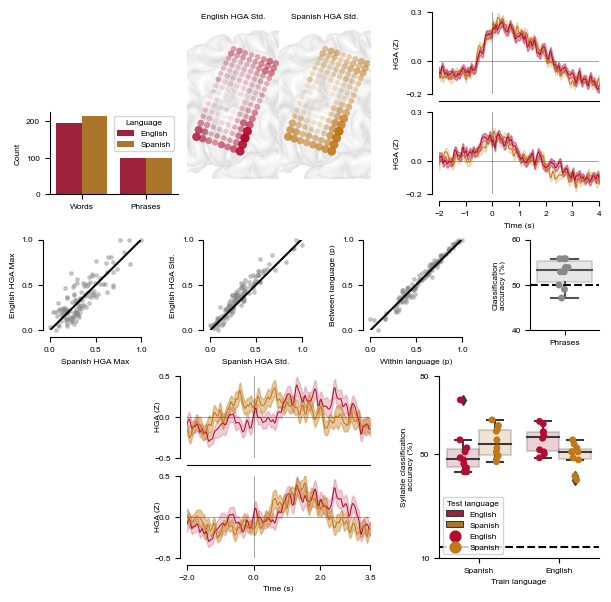

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
# Computes and plots the dendrogram
import seaborn as sns
import matplotlib.font_manager
import matplotlib as mpl
from gimutil.visualization import plotting_tools
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'
# Specifies plot parameters
erp_pad = 20
rows = {
    'top_start' : 0,
    'top_stop'  : 400,
    'erplang_start':0,
    'erplang_stop':200-erp_pad,
    'erplang2_start':200+erp_pad,
    'erplang2_stop':400,
    'bot_start': 500,
    'bot_stop' : 700,
    'last_start': 800,
    'last_stop' : 1200,
    'erpsyl_start': 800,
    'erpsyl_stop': 800 + 200 - erp_pad,
    'erpsyl2_start': 800 + 200 + erp_pad,
    'erpsyl2_stop' : 1200,
    'total'      : 1200
}
grid_width = 150
grid_pad = 0
erp_pad = 150
erp_width = 150
scatter_pad = 70
scatter_width = 200
decode_pad = 90
start_erp = grid_width + grid_pad + grid_width + erp_pad

maxs_stop = start_erp-100

total_width = 1200
grids_start = 300
grid_width = 200
grid_pad = 0
erp_pad = 150


scatter_width = 200
scatter_pad = 150
end_scatters = 2*scatter_width+scatter_pad

corr_width = 225
cols = {
    'schematic_start': 0 ,
    'schematic_stop' : grids_start-20,
    'enggrid_start' : grids_start,
    'enggrid_stop'  : grids_start+ grid_width,
    'spagrid_start' : grids_start + grid_width + grid_pad,
    'spagrid_stop'  : grids_start + 2*grid_width + grid_pad,
    'erp1_start': grids_start + 2*grid_width + grid_pad + erp_pad,
    'erp1_stop' : total_width,
    # 'erp2_start': start_erp+erp_width+erp_pad,
    # 'erp2_stop' : start_erp+erp_width+erp_pad+erp_width,
    'maxs_start': 0,
    'maxs_stop': scatter_width,
    'stds_start':scatter_width+scatter_pad,
    'stds_stop':2*scatter_width+scatter_pad,
    'corr_start':end_scatters+scatter_pad,
    'corr_stop':end_scatters+scatter_pad+scatter_width,
    'decode_start':end_scatters+scatter_pad+scatter_width+scatter_pad,
    'decode_stop':total_width,
    'sylerp_start': grids_start,
    'sylerp_stop' : grids_start + 2*grid_width + grid_pad,
    'syldec_start': grids_start + 2*grid_width + grid_pad + erp_pad,
    'syldec_stop' : total_width,
    'total'      : total_width
}
all_panel_params = {
    'schem' : {'row_and_col_spec' : ('erplang2', 'schematic')},    
    'enggrid' : {'row_and_col_spec' : ('top', 'enggrid')},
    'spagrid' : {'row_and_col_spec' : ('top', 'spagrid')},
    'erp1' : {'row_and_col_spec' : ('erplang', 'erp1')},
    'erp2' : {'row_and_col_spec' : ('erplang2', 'erp1')},
    'maxs' : {'row_and_col_spec' : ('bot', 'maxs')}, 
    'stds':{'row_and_col_spec' : ('bot', 'stds')},
    'corr':{'row_and_col_spec' : ('bot', 'corr')},
    
    'decode':{'row_and_col_spec' : ('bot', 'decode')},
    'sylerp1':{'row_and_col_spec' : ('erpsyl', 'sylerp')},
    'sylerp2':{'row_and_col_spec' : ('erpsyl2', 'sylerp')},
    'syldecode':{'row_and_col_spec' : ('last', 'syldec')}    
    
}

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hex_col = sns.color_palette("deep", as_cmap=True)
#colors = ['#3f84e5','#b20d30','#c17817','#3f784c','#3f84e5']
colors = ['#b20d30','#c17817','#3f84e5','#3f784c']

# Creates the plot
w_to_h = 1.
width = 7.08661
fig, axs = plotting_tools.setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,
    figsize=(width,width/w_to_h)#(12,12)
)

ax = axs['schem']
sns.barplot(data=panel_a,y='Count',x='Type',hue='Language',palette=[colors[0],colors[1]],ax=ax)
ax.set_xlabel('')

ax = axs['enggrid']
ax.set_title('English HGA Std.',fontsize=6)
plot_vals_on_brain(panel_b['English HGA Std.'],'#b20d30',fig,ax)    

ax.axes.set_xlim([200,500])
ax.axes.set_ylim([100,600])

ax = axs['spagrid']
ax.set_title('Spanish HGA Std.',fontsize=6)
plot_vals_on_brain(panel_b['Spanish HGA Std.'],'#c17817',fig,ax)  
ax.axes.set_xlim([200,500])
ax.axes.set_ylim([100,600])


ax = axs['erp1']
x = panel_c['time_axis']   




ax.axhline(y=0, color='k', alpha=0.5, linewidth=0.5)
ax.axvline(x=0, color='k', alpha=0.5, linewidth=0.5)
ax.plot(x,panel_c['Spanish mean e0'],color='#c17817',linewidth = .75)
ax.plot(x,panel_c['English mean e0'],color='#b20d30',linewidth = .75)
ax.fill_between(x,panel_c['Spanish mean e0'] + panel_c['Spanish sem e0'],
                panel_c['Spanish mean e0'] - panel_c['Spanish sem e0'],color='#c17817',alpha=0.2)
ax.fill_between(x,panel_c['English mean e0'] + panel_c['English sem e0'],
                panel_c['English mean e0'] - panel_c['English sem e0'],color='#b20d30',alpha=0.4) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('HGA (Z)')
ax.set_yticks([-0.2,0,0.3])
ax.set_ylim([-0.2,0.3])
ax.set_xlim([-2,4])
ax.get_xaxis().set_visible(False)
sns.despine(ax=ax, offset=dict(left=5, bottom=5))

elec = 106

ax = axs['erp2']
ax.axhline(y=0, color='k', alpha=0.5, linewidth=0.5)
ax.axvline(x=0, color='k', alpha=0.5, linewidth=0.5)
ax.plot(x,panel_c['Spanish mean e1'],color='#c17817',linewidth = .75)
ax.plot(x,panel_c['English mean e1'],color='#b20d30',linewidth = .75)
ax.fill_between(x,panel_c['Spanish mean e1'] + panel_c['Spanish sem e1'],
                panel_c['Spanish mean e1'] - panel_c['Spanish sem e1'],color='#c17817',alpha=0.2)
ax.fill_between(x,panel_c['English mean e1'] + panel_c['English sem e1'],
                panel_c['English mean e1'] - panel_c['English sem e1'],color='#b20d30',alpha=0.4) 
ax.set_yticks([-0.2,0,0.3])
ax.set_ylim([-0.2,0.3])

ax.set_xlabel('Time (s)')
ax.set_ylabel('HGA (Z)')
ax.set_xlim([-2,4])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))





ax = axs['maxs']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ax.scatter(panel_d['English maxs.'],
           panel_d['Spanish maxs.'],color='#898989',alpha=0.4,clip_on=False,s=6)
ax.plot([0,1],[0,1],color='k')
ax.set_xlim([0,1])
ax.set_xticks([0,0.5,1])
ax.set_ylim([0,1])
ax.set_yticks([0,0.5,1])
ax.set_ylabel('English HGA Max')
ax.set_xlabel('Spanish HGA Max')
sns.despine(ax=ax, offset=dict(left=5, bottom=5))


ax = axs['stds']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ax.scatter(panel_e['English std.'],
           panel_e['Spanish std.'],color='#898989',alpha=0.4,clip_on=False,s=6)
ax.plot([0,1],[0,1],color='k')

ax.set_ylabel('English HGA Std.')
ax.set_xlabel('Spanish HGA Std.')
ax.set_xlim([0,1])
ax.set_xticks([0,0.5,1])
ax.set_ylim([0,1])
ax.set_yticks([0,0.5,1])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))




ax = axs['corr']
ax.scatter(panel_f['In language corr'],
           panel_f['Out language corr'],color='#898989',alpha=0.4
           ,clip_on=False,s=6)
ax.plot([0,1],[0,1],color='k')


ax.set_xlabel('')
ax.set_xlabel('Within language (p)')
ax.set_ylabel('Between language (p)')
ax.set_xlim([0,1])
ax.set_xticks([0,0.5,1])
ax.set_ylim([0,1])
ax.set_yticks([0,0.5,1])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))






ax = axs['decode']

sns.boxplot(data=panel_g,ax=ax,color='#898989',boxprops={'alpha':0.2})
sns.stripplot(data=panel_g,ax=ax,color='#898989')

ax.set_ylim([40,60])
ax.set_yticks([40,50,60])
ax.axhline(50,color='k',linestyle='--')
ax.set_ylabel('Classification\naccuracy (%)')
ax.set_xticklabels(['Phrases'])


###



ax = axs['sylerp1']

x = panel_i['x']   

ax.axhline(y=0, color='k', alpha=0.5, linewidth=0.5)
ax.axvline(x=0, color='k', alpha=0.5, linewidth=0.5)
ax.plot(x,panel_i['erp1_top'],color='#b20d30',linewidth = .75)
ax.plot(x,panel_i['erp2_top'],color='#c17817',linewidth = .75)
ax.fill_between(x,panel_i['erp1_top'] + panel_i['sem1_top'],
                panel_i['erp1_top'] - panel_i['sem1_top'],
                color='#b20d30',alpha=0.2)
ax.fill_between(x,panel_i['erp2_top'] + panel_i['sem2_top'],
                panel_i['erp2_top'] - panel_i['sem2_top'],
                color='#c17817',alpha=0.4) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('HGA (Z)',labelpad=-5)
#ax.set_ylim([-0.4,0.4])
ax.set_xlim([-2,3.5])
ax.get_xaxis().set_visible(False)

sns.despine(ax=ax, offset=dict(left=5, bottom=5))
# ax.spines['bottom'].set_visible(False)
# ax.xaxis.set_tick_params(length=0)
ax.set_yticks([-0.5,0,0.5])
ax.set_ylim([-0.5,0.5])



ax = axs['sylerp2']


ax.axhline(y=0, color='k', alpha=0.5, linewidth=0.5)
ax.axvline(x=0, color='k', alpha=0.5, linewidth=0.5)

ax.plot(x,panel_i['erp1_bottom'],color='#b20d30',linewidth = .75)
ax.plot(x,panel_i['erp2_bottom'],color='#c17817',linewidth = .75)
ax.fill_between(x,panel_i['erp1_bottom'] + panel_i['sem1_bottom'],
                panel_i['erp1_bottom'] - panel_i['sem1_bottom'],
                color='#b20d30',alpha=0.2)
ax.fill_between(x,panel_i['erp2_bottom'] + panel_i['sem2_bottom'],
                panel_i['erp2_bottom'] - panel_i['sem2_bottom'],
                color='#c17817',alpha=0.4) 


ax.set_xlabel('Time (s)')
ax.set_ylabel('HGA (Z)',labelpad=-5)
ax.set_xlim([-2,3.5])
ax.set_xticks([-2,0,2,3.5])
ax.set_yticks([-0.5,0,0.5])
ax.set_ylim([-0.5,0.5])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))



ax = axs['syldecode']
sns.boxplot(data=panel_j,y='Syllable accuracy',x='Train language',hue='Test language',ax=ax,palette=[colors[0],colors[1]],boxprops={'alpha':0.2})
sns.stripplot(data=panel_j,y='Syllable accuracy',x='Train language',hue='Test language',ax=ax,palette=[colors[0],colors[1]],dodge=True)

ax.set_ylim([10,80])
ax.set_yticks([10,50,80])
ax.axhline(100/7.,color='k',linestyle='--')
ax.set_ylabel('Syllable classification\n accuracy (%)')
fig.savefig('./fig3.svg',bbox_inches='tight')